In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Header 

We are basically trying to predict the outcome (whether it is successful or not) given the independent variables such as time of attempt, the master code entered and the one-time code (OTC) entered

In [2]:
df = pd.read_csv('IoT data analytic.csv', header=0)
df

,Unnamed: 0,Time of attempt,Master Code,OTC,Outcome
0,0,20:42:42,0,[],0
1,0,20:42:45,0,[],0
2,0,20:42:47,0,[''],0
3,0,20:42:48,0,['Please Enter Passcode:'],0
4,0,20:42:51,0,[],0
...,...,...,...,...,...
5023,0,00:49:56,0,"['Incorrect, please enter again:']",0
5024,0,00:49:57,0,['4254'],0
5025,0,00:49:58,0,"['Incorrect, please enter again:']",0
5026,0,00:49:59,['5566'],0,1


In [3]:
df.isna().any() # checking for any missing values 

Unnamed: 0         False
Time of attempt    False
Master Code        False
OTC                False
Outcome            False
dtype: bool

In [4]:
df['Outcome'].unique() # checking for unique terms within the particular column 

array([0, 1])

In [5]:
df['OTC'].unique()

array(['[]', "['']", "['Please Enter Passcode:']", "['4235']",
       "['Incorrect, please enter again:']", "['6710']", "['6071']",
       "['6107']", "['Welcome']", "['8745']", "['8909']", "['909']",
       "['9089']", "['7777']", "['5263']", "['9524']", "['3975']",
       "['3795']", '0', "['2356']", "['5556']", "['5666']", "['4565']",
       "['74125']", "['77']", "['852']", "['8888']", "['3333']",
       "['2145']", "['7212']", "['6985']", "['7785']", "['1542']",
       "['2536']", "['4257']", "['4563']", "['7859']", "['2458']",
       "['7858']", "['8656']", "['7856']", "['8895566']", "['4425']",
       "['2365']", "['4568']", "['7895']", "['2563']", "['1447']",
       "['8554']", "['8962']", "['5736']", "['8142']", "['9654']",
       "['6947']", "['6973']", "['6974']", "['8910']", "['7536']",
       "['1254']", "['859']", "['44456']", "['7852']", "['6111']",
       "['611126']", "['88']", "['6655']", "['2354']", "['7541']",
       "['8896']", "['9542']", "['6589']", "['75587']", 

In [6]:
df['Outcome'].value_counts()

0    5001
1      27
Name: Outcome, dtype: int64

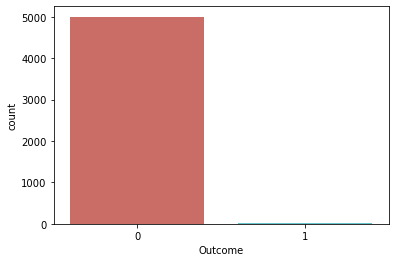

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x = df['Outcome'], data = df, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [8]:
df.dtypes # this is to check what data types the elements inside the dataframe are

Unnamed: 0          int64
Time of attempt    object
Master Code        object
OTC                object
Outcome             int64
dtype: object

In [9]:
# this is to drop the unnamed columns which in this dataframe
df = df.drop(columns='Unnamed: 0')
df

,Time of attempt,Master Code,OTC,Outcome
0,20:42:42,0,[],0
1,20:42:45,0,[],0
2,20:42:47,0,[''],0
3,20:42:48,0,['Please Enter Passcode:'],0
4,20:42:51,0,[],0
...,...,...,...,...
5023,00:49:56,0,"['Incorrect, please enter again:']",0
5024,00:49:57,0,['4254'],0
5025,00:49:58,0,"['Incorrect, please enter again:']",0
5026,00:49:59,['5566'],0,1


In [10]:
# this is basically to convert the time of attempt column to be of the datetime datatype 
df['Time of attempt'] = df['Time of attempt'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time of attempt  5028 non-null   datetime64[ns]
 1   Master Code      5028 non-null   object        
 2   OTC              5028 non-null   object        
 3   Outcome          5028 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 157.2+ KB


In [11]:
# getting the dataframe to be converted to a specific datatype by recommendation 
df_new = df.convert_dtypes(['Master Code', 'OTC', 'Outcome'])
df_new.dtypes

Time of attempt    datetime64[ns]
Master Code                string
OTC                        string
Outcome                     Int64
dtype: object

In [12]:
# since the element inside the 'Master Code' column has ['5566'],
# we will begin by removing the square brackets first 
df_new['Master Code'] = df_new['Master Code'].str.strip('[]')
df_new['Master Code']

0            0
1            0
2            0
3            0
4            0
         ...  
5023         0
5024         0
5025         0
5026    '5566'
5027         0
Name: Master Code, Length: 5028, dtype: string

In [13]:
# we will also preprocess the OTC elements 
df_new['OTC'] = df_new['OTC'].str.strip('[]')
df_new['OTC']

0                                       
1                                       
2                                     ''
3               'Please Enter Passcode:'
4                                       
                      ...               
5023    'Incorrect, please enter again:'
5024                              '4254'
5025    'Incorrect, please enter again:'
5026                                   0
5027                           'Welcome'
Name: OTC, Length: 5028, dtype: string

In [14]:
# after which we will remove the inverted commas inside 
df_new['Master Code'] = df_new['Master Code'].str.strip("''")
df_new['Master Code']

0          0
1          0
2          0
3          0
4          0
        ... 
5023       0
5024       0
5025       0
5026    5566
5027       0
Name: Master Code, Length: 5028, dtype: string

In [15]:
# removing the inverted commas from OTC
df_new['OTC'] = df_new['OTC'].str.strip("''")
df_new['OTC']

0                                     
1                                     
2                                     
3               Please Enter Passcode:
4                                     
                     ...              
5023    Incorrect, please enter again:
5024                              4254
5025    Incorrect, please enter again:
5026                                 0
5027                           Welcome
Name: OTC, Length: 5028, dtype: string

In [16]:
# we want to remove specific strings that would not be useful from the OTC column 
df_new.drop(df_new.index[df_new['OTC'] == 'Please Enter Passcode:'], inplace = True)
df_new.drop(df_new.index[df_new['OTC'] == 'Incorrect, please enter again:'], inplace = True)
df_new.drop(df_new.index[df_new['OTC'] == 'Welcome'], inplace = True)

In [17]:
# download the csv to check for any missing values
#df_new.to_csv('test.csv')

In [18]:
# since there are missing values we need to remove them from the columns
df_new.dropna(subset = ['OTC'], inplace=True)
df_new

,Time of attempt,Master Code,OTC,Outcome
0,2020-11-30 20:42:42,0,,0
1,2020-11-30 20:42:45,0,,0
2,2020-11-30 20:42:47,0,,0
4,2020-11-30 20:42:51,0,,0
5,2020-11-30 20:42:54,0,,0
...,...,...,...,...
5018,2020-11-30 00:49:51,0,5555,0
5020,2020-11-30 00:49:53,0,8888,0
5022,2020-11-30 00:49:55,0,7777,0
5024,2020-11-30 00:49:57,0,4254,0


In [19]:
# so apparently these missing values are empty strings 
# so we will replace these empty strings with NaN
df_new['OTC'].replace('', np.nan, inplace=True)
df_new

,Time of attempt,Master Code,OTC,Outcome
0,2020-11-30 20:42:42,0,<NA>,0
1,2020-11-30 20:42:45,0,<NA>,0
2,2020-11-30 20:42:47,0,<NA>,0
4,2020-11-30 20:42:51,0,<NA>,0
5,2020-11-30 20:42:54,0,<NA>,0
...,...,...,...,...
5018,2020-11-30 00:49:51,0,5555,0
5020,2020-11-30 00:49:53,0,8888,0
5022,2020-11-30 00:49:55,0,7777,0
5024,2020-11-30 00:49:57,0,4254,0


In [20]:
# dropping NaN from our 'OTC' column
# we can then convert this column into a 'int64' dtype
df_new.dropna(subset = ['OTC'], inplace = True)
df_new

,Time of attempt,Master Code,OTC,Outcome
6,2020-11-30 20:42:56,0,4235,0
8,2020-11-30 20:42:59,0,6710,0
10,2020-11-30 20:43:02,0,6071,0
12,2020-11-30 20:43:06,0,6107,1
16,2020-11-30 20:43:18,0,8745,0
...,...,...,...,...
5018,2020-11-30 00:49:51,0,5555,0
5020,2020-11-30 00:49:53,0,8888,0
5022,2020-11-30 00:49:55,0,7777,0
5024,2020-11-30 00:49:57,0,4254,0


In [21]:
# converting both the columns into dtype 'int64'
df_new['Master Code'] = df_new['Master Code'].astype('int64')
df_new['Outcome'] = df_new['Outcome'].astype('int64')
df_new['OTC'] = df_new['OTC'].astype('int64')

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 6 to 5026
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time of attempt  122 non-null    datetime64[ns]
 1   Master Code      122 non-null    int64         
 2   OTC              122 non-null    int64         
 3   Outcome          122 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.8 KB


In [23]:
# to keep it to 2 decimal place 
count_successful = len(df[df['Outcome'] == 1])
count_unsuccessful = len(df[df['Outcome'] == 0])

pct_of_success = count_successful/(count_successful+count_unsuccessful)
print("percentage of success is", pct_of_success*100)

pct_of_unsuccessful = count_unsuccessful/(count_successful+count_unsuccessful)
print("percentage of success is", pct_of_unsuccessful*100)

percentage of success is 0.5369928400954653
percentage of success is 99.46300715990454


In [24]:
df_new.groupby('Outcome').count()

,Time of attempt,Master Code,OTC
Outcome,,,
0,95,95,95
1,27,27,27


In [25]:
df_new['Outcome'].value_counts()

0    95
1    27
Name: Outcome, dtype: int64

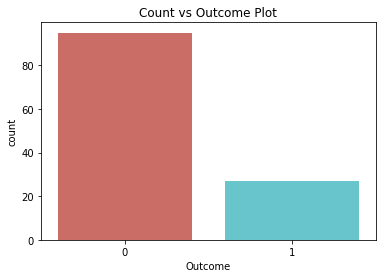

<Figure size 432x288 with 0 Axes>

In [26]:
# this graph basically tells us how many times the outcome was '1' and '0'
sns.countplot(x = df_new['Outcome'], data = df_new, palette = 'hls')
plt.title('Count vs Outcome Plot')
plt.show()
plt.savefig('count_plot')

In [27]:
# to change this to 2 decimal place 
count_successful = len(df[df['Outcome'] == 1])
count_unsuccessful = len(df[df['Outcome'] == 0])

pct_of_success = count_successful/(count_successful+count_unsuccessful)
print("percentage of success is", pct_of_success*100)

pct_of_unsuccessful = count_unsuccessful/(count_successful+count_unsuccessful)
print("percentage of success is", pct_of_unsuccessful*100)

percentage of success is 0.5369928400954653
percentage of success is 99.46300715990454


In [28]:
# there was an issue in which datetime64[ns] cannot be used for prediction
# hence these codes
import datetime as dt
df_new['Time of attempt'] = pd.to_datetime(df_new['Time of attempt'])
df_new['Time of attempt']=df_new['Time of attempt'].map(dt.datetime.toordinal)

In [29]:
# our independent variables master code, OTC and time 
# our dependent variables is outcome

X = df_new[['Time of attempt', 'Master Code', 'OTC']]
y = df_new['Outcome']

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [31]:
logisticRegr = LogisticRegression()

# fitting the training datasets
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(97, 3)
(97,)
(25, 3)
(25,)


In [33]:
# making predictions on entire dataall
predictions = logisticRegr.predict(X_test)

In [34]:
# create a confusion matrix with y_test and predictions
cm = metrics.confusion_matrix(y_test, predictions)

In [35]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("-----------------------------------")
print("The accuracy of the model is: " + str(score))

-----------------------------------
The accuracy of the model is: 0.88


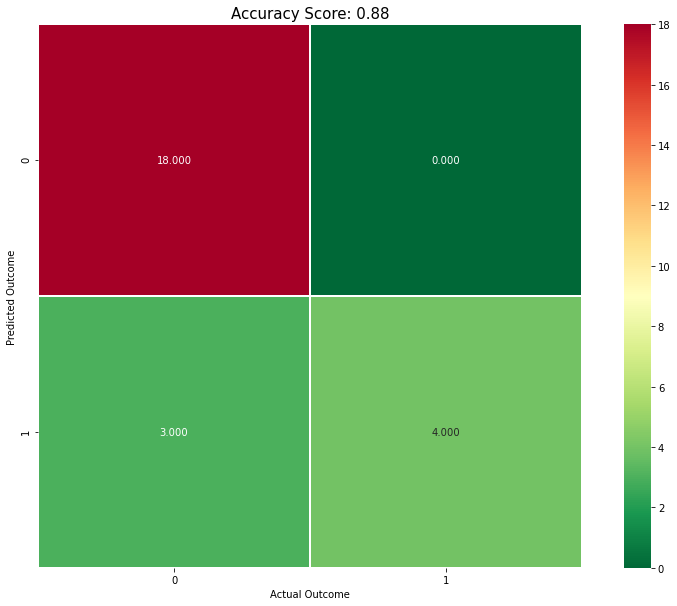

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths = 1, square = True, cmap = 'RdYlGn_r');
# this graph actually plots the confusion matrix
# fmt basically leaves the float's decimal points to 3 sf
plt.ylabel('Predicted Outcome');
plt.xlabel('Actual Outcome');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Comments 

So basically a 1 for predicted outcome and a 1 for actual outcome would mean a True positive  
    - Interpretation: You predicted positive and it’s true.
    
a 1 for predicted outcome and a 0 for actual outcome would mean a False positive  
    - Interpretation: You predicted positive and it’s false. 

a 0 for predicted outcome and a 1 for actual outcome would mean a False negative  
    - Interpretation: You predicted negative and it’s false.

a 0 for predicted outcome and a 0 for actual outcome would mean a True negative  
    - Interpretation: You predicted negative and it’s true.

## Accuracy 

Accuracy = number of correct predictions/ total number of predictions

(TP + TN) / (TP + TN + FP + FN)

## Precision

Precision = TP / (TP + FP)

## True positive rate

Recall = TP/ (TP + FN)

## True negative rate

specificity = TN / (TN + FP)

## F1 Score 

The F1 score is a measure of a test’s accuracy — it is the harmonic mean of precision and recall. It can have a maximum score of 1 (perfect precision and recall) and a minimum of 0. Overall, it is a measure of the preciseness and robustness of your model.

In [37]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[18,  0],
       [ 3,  4]])

In [38]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.88

In [39]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average=None)

array([1.        , 0.57142857])

In [40]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average=None)

array([0.85714286, 1.        ])

In [41]:
# Method 1: sklearn
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average=None)

array([0.92307692, 0.72727273])

In [42]:
# Method 3: Classification report [BONUS]
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.57      0.73         7

    accuracy                           0.88        25
   macro avg       0.93      0.79      0.83        25
weighted avg       0.90      0.88      0.87        25

